In [1]:
import pandas as pandas
from matplotlib import pyplot
import json
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torch.autograd as autograd         # computation graph
from torch import Tensor                  # tensor node in the computation graph
import torch.nn as nn                     # neural networks
import torch.nn.functional as F           # layers, activations and more
import torch.optim as optim               # optimizers e.g. gradient descent, ADAM, etc.
from torch.jit import script, trace       # hybrid frontend decorator and tracing jit
from torchvision import datasets, models, transforms
import torchvision.transforms as transforms
import torchvision
from tqdm import tqdm

print(torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


True


In [2]:
preset = False
if preset:
    baseModel = models.resnet18(pretrained=False)
    modules=list(baseModel.children())[:-1]
    baseModel=nn.Sequential(*modules)
    baseModel.load_state_dict(torch.load("F:\\models\\basemodel\\basemodel1.model"))
    classModel = nn.Linear(512, 1)
    classModel.load_state_dict(torch.load("F:\\models\\classmodel\\classmodel1.model"))
    domainModel = nn.Linear(512, 1)
    domainModel.load_state_dict(torch.load("F:\\models\\domainmodel\\domainmodel1.model"))
    print("PRELOADED")
else:
    baseModel = models.resnet18(pretrained=True)
    print(baseModel)
    modules=list(baseModel.children())[:-1]
    baseModel=nn.Sequential(*modules)
    print(baseModel)
    classModel = nn.Linear(512, 1)
    domainModel = nn.Linear(512, 1)
    print("NEWSTART")

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [3]:
'''
import csv
import os
fairFaceList = []
fairFaceListRace = []
fairFaceMax = 100000

root = "E:\\fairface-img-margin025-trainval\\train\\"
im = os.listdir("E:\\fairface-img-margin025-trainval\\train\\")

with open('E:\\fairface-img-margin025-trainval\\fairface_label_train.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    out = list(reader)
    out = out[1:]
    genders = np.array(out)[:,2].tolist()
    race = np.array(out)[:,3].tolist()

genders = genders[:fairFaceMax]
race = race[:fairFaceMax]
for i,val in enumerate(genders, 0):
    if val == "Male":
        genders[i] = 1
    elif val == "Female":
        genders[i] = 0
    else:
        print("NOPE")

for i,val in enumerate(race, 0):
    if val == "East Asian":
        end = 0 
    elif val == "Indian":
        end = 1 
    elif val == "Black":
        end = 2 
    elif val == "White":
        end = 3
    elif val == "Middle Eastern":
        end = 4
    elif val == "Latino_Hispanic":
        end = 5
    elif val == "Southeast Asian":
        end = 6
    else:
        print("ISSUEE")
    race[i] = end




for i in range(len(genders)):
    a = root + im[i]
    fairFaceList.append((a,  (genders[i],race[i])   ))
'''

'\nimport csv\nimport os\nfairFaceList = []\nfairFaceListRace = []\nfairFaceMax = 100000\n\nroot = "E:\\fairface-img-margin025-trainval\\train\\"\nim = os.listdir("E:\\fairface-img-margin025-trainval\\train\\")\n\nwith open(\'E:\\fairface-img-margin025-trainval\\fairface_label_train.csv\', newline=\'\') as csvfile:\n    reader = csv.reader(csvfile)\n    out = list(reader)\n    out = out[1:]\n    genders = np.array(out)[:,2].tolist()\n    race = np.array(out)[:,3].tolist()\n\ngenders = genders[:fairFaceMax]\nrace = race[:fairFaceMax]\nfor i,val in enumerate(genders, 0):\n    if val == "Male":\n        genders[i] = 1\n    elif val == "Female":\n        genders[i] = 0\n    else:\n        print("NOPE")\n\nfor i,val in enumerate(race, 0):\n    if val == "East Asian":\n        end = 0 \n    elif val == "Indian":\n        end = 1 \n    elif val == "Black":\n        end = 2 \n    elif val == "White":\n        end = 3\n    elif val == "Middle Eastern":\n        end = 4\n    elif val == "Latino_

In [4]:
'''
from PIL import Image
class MakeDataset(Dataset):
    def __init__(self, dataList, transforms=None):
        self.X = [item[0] for item in dataList]
        self.y = [int(item[1][0]) for item in dataList]
        self.yR = [int(item[1][1]) for item in dataList]
        self.transforms = transforms
         
    def __len__(self):
        return (len(self.X))
    
    def __getitem__(self, i):
        
        data = self.X[i]
        a = Image.open(data, "r")
        
        return (self.transforms(a), (self.y[i] , self.yR[i]) )
'''




'\nfrom PIL import Image\nclass MakeDataset(Dataset):\n    def __init__(self, dataList, transforms=None):\n        self.X = [item[0] for item in dataList]\n        self.y = [int(item[1][0]) for item in dataList]\n        self.yR = [int(item[1][1]) for item in dataList]\n        self.transforms = transforms\n         \n    def __len__(self):\n        return (len(self.X))\n    \n    def __getitem__(self, i):\n        \n        data = self.X[i]\n        a = Image.open(data, "r")\n        \n        return (self.transforms(a), (self.y[i] , self.yR[i]) )\n'

In [5]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


#dataset = MakeDataset(fairFaceList, preprocess)
dataset = torchvision.datasets.CelebA(root = "C:\\Users\\Bill\\Desktop\\pbias\\CelebA\\", split='train', target_type='attr', transform=preprocess, download=True)


datasetValidation = torchvision.datasets.CelebA(root = "C:\\Users\\Bill\\Desktop\\pbias\\CelebA\\", split='valid', target_type='attr', transform=preprocess, download=True)

train_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=64,
                                          shuffle=True,
                                          num_workers=4)
valid_loader = torch.utils.data.DataLoader(datasetValidation,
                                          batch_size=64,
                                          shuffle=True,
                                          num_workers=4)

          

Files already downloaded and verified
Files already downloaded and verified


In [6]:
lossf = nn.BCEWithLogitsLoss()
lossg = nn.CrossEntropyLoss()
base_optimizer = optim.SGD(baseModel.parameters(), lr=0.001, momentum=0.9)
class_optimizer = optim.SGD(classModel.parameters(), lr=0.001, momentum=0.9)
domain_optimizer = optim.SGD(domainModel.parameters(), lr=0.001, momentum=0.9)
lossf.to(device)
lossg.to(device)

baseModel.to(device)
classModel.to(device)
domainModel.to(device)



Linear(in_features=512, out_features=1, bias=True)

In [7]:
training_ratio = 3
alpha = 2

In [8]:
def getAccuracy(c , d):
    correct = 0
    if isinstance(d[0],list):
        for a,b in zip(c, d):
            if a == b[0]:
                correct+= 1
    else:
        for a,b in zip(c, d):
            if a == b:
                correct+= 1
    return(100*(correct/len(c)))

In [9]:
ClassLossList = []
DomainLossList = []

classEpochAccuracy = []
domainEpochAccuracy = []
validEpochAccuracy = []

for epoch in range(20):  
    ClassLoss = 0.0
    DomainLoss = 0.0
    allClassLabels = []
    allDomainLabels = []
    allClassOutputs = []
    allDomainOutputs = []

    allValidLabels = []
    allValidOutputs = []
    for  i,data in enumerate(tqdm(train_loader), 0):
        inputs, labels = data
                
                
        classLabels = labels[:,7].unsqueeze(1).float()
        domainLabels = labels[:,20].unsqueeze(1).float()
                
        allClassLabels.extend(classLabels.tolist())
        allDomainLabels.extend(domainLabels.tolist())

            

        base_optimizer.zero_grad()
        class_optimizer.zero_grad()
        domain_optimizer.zero_grad()

        inputs = inputs.cuda()
        classLabels = classLabels.cuda()
        domainLabels = domainLabels.cuda()
                    
        base_outputs = baseModel(inputs).squeeze()
        class_outputs = classModel(base_outputs)
        domain_outputs = domainModel(base_outputs)

        class_loss = lossf(class_outputs, classLabels)
        domain_loss = lossf(domain_outputs, domainLabels)

        softMaxClass = F.sigmoid(class_outputs)
        softMaxDomain = F.sigmoid(domain_outputs)


        allClassOutputs.extend(softMaxClass.tolist())
        allDomainOutputs.extend(softMaxDomain.tolist())

        if epoch % training_ratio == 0:
            LS = nn.LogSigmoid()
            log_softmax = LS(domain_outputs)
            confusion_loss = -log_softmax.mean(dim=1).mean()
            loss = class_loss + alpha*confusion_loss
            loss.backward()
            class_optimizer.step()
            base_optimizer.step()
        else:
            domain_loss.backward()
            domain_optimizer.step()


                
        #loss
        ClassLoss += class_loss.item()*list(inputs.size())[0]
        DomainLoss += domain_loss.item()*list(inputs.size())[0]  

    #Calculating  Accuracy
    allClassOutputs = [ 1.0 if q[0] > 0.5 else 0.0 for q in allClassOutputs]
    classEpochAccuracy.append(getAccuracy(allClassOutputs,allClassLabels))
    allDomainOutputs = [ 1.0 if q[0] > 0.5 else 0.0 for q in allDomainOutputs]
    domainEpochAccuracy.append(getAccuracy(allDomainOutputs,allDomainLabels))



    #Saving Epoch Models
    torch.save(baseModel.state_dict(), "F:\\models\\basemodel\\basemodel" + str(epoch) + ".model")
    torch.save(classModel.state_dict(), "F:\\models\\classmodel\\classmodel" + str(epoch) + ".model")
    torch.save(domainModel.state_dict(), "F:\\models\\domainmodel\\domainmodel" + str(epoch) + ".model")
        #more loss
    ClassLoss /= len(train_loader)
    DomainLoss /= len(train_loader)
    ClassLossList.append(ClassLoss)
    DomainLossList.append(DomainLoss)


    for  i,data in enumerate(tqdm(valid_loader),0):
        inputs, labels = data
        classLabels = labels[:,7].unsqueeze(1).float()
        allValidLabels.extend(classLabels.tolist())

        inputs = inputs.cuda()
        labels = labels.cuda()

        base_outputs = baseModel(inputs).squeeze()
        class_outputs = classModel(base_outputs)

        softMaxValid = F.sigmoid(class_outputs)

        allValidOutputs.extend(softMaxValid.tolist())


    allValidOutputs = [ 1.0 if q[0] > 0.5 else 0.0 for q in allValidOutputs]
    validEpochAccuracy.append(getAccuracy(allValidOutputs,allValidLabels))
    

100%|██████████| 311/311 [00:25<00:00, 12.19it/s]


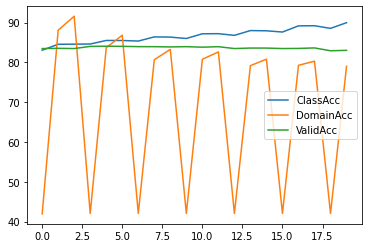

In [54]:
import matplotlib.pyplot as plt
import weakref
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

lines = ax.plot(classEpochAccuracy, label = 'ClassAcc')
lines.append(ax.plot(domainEpochAccuracy, label = 'DomainAcc'))
lines.append(ax.plot(validEpochAccuracy, label = 'ValidAcc'))
plt.legend()
plt.show()

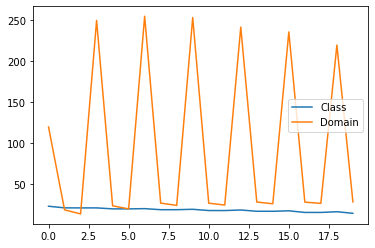

In [58]:

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
lines = ax.plot(ClassLossList, label = 'Class')
lines.append(ax.plot(DomainLossList, label = 'Domain'))
plt.legend()


In [11]:
import pickle
def save():
    file = open("C:\\Users\\Bill\\Desktop\\pbias\\outputs\\output2.txt", "w")
    file.write("Class Losses: ")
    file.writelines(str(ClassLossList))
    file.write("\n")
    file.write("Domain Losses: ")
    file.writelines(str(DomainLossList))
    file.write("\n")
    file.write("\n")
    file.write("Class Labels: ")
    file.write(str(allClassLabels))
    file.write("\n")
    file.write("Class Outputs: ")
    file.write(str(allClassOutputs))
    file.write("\n")
    file.write("Domain Labels: ")
    file.write(str(allDomainLabels))
    file.write("\n")
    file.write("Domain Outputs: ")
    file.write(str(allDomainOutputs))
    file.write("\n")
    file.write("Valid Labels: ")
    file.write(str(allValidLabels))
    file.write("\n")
    file.write("Valid Outputs: ")
    file.write(str(allValidOutputs))
    file.close()


    picklefile = open("C:\\Users\\Bill\\Desktop\\pbias\\outputs\\pickle2.txt", "ab")

    pickleList = [allClassLabels, allClassOutputs, allDomainLabels, allDomainOutputs, allValidLabels, allValidOutputs, classEpochAccuracy, domainEpochAccuracy, validEpochAccuracy]
    pickle.dump(pickleList,picklefile)
    picklefile.close()
    print("DID SAVE")

In [12]:
print(classEpochAccuracy)
print(validEpochAccuracy)
print(domainEpochAccuracy)

[83.06014621859065, 84.54752104196105, 84.5745530503164, 84.61202924371814, 85.50654297474965, 85.50039933648706, 85.35295201818516, 86.40351416108619, 86.34822141672298, 86.00172021871352, 87.18744240339129, 87.21263132026786, 86.78933464397616, 87.99348774344166, 87.93573754377341, 87.62425508386066, 89.17798120046692, 89.20624193647478, 88.54825827855257, 89.97173926399213]
[83.47007600543616, 83.5355111491418, 83.4751094780289, 84.01369104545225, 84.06402577137968, 84.02879146323048, 83.95328937433936, 83.94322242915388, 83.88282075804098, 83.94825590174662, 83.81738561433532, 83.94322242915388, 83.4751094780289, 83.5959128202547, 83.59087934766195, 83.4751094780289, 83.50531031358534, 83.63114712840388, 82.91639402023456, 83.02209694468213]
[41.91005713583584, 88.0979295939055, 91.59365976531302, 42.03354426491368, 83.6941696872888, 86.81820974381029, 42.030472445782394, 80.6714996620999, 83.25981446212447, 42.03231553726117, 80.77409842108496, 82.6257909934263, 42.02862935430362,

In [13]:
save()

DID SAVE


In [14]:
print(ClassLossList)

[23.55005973455666, 21.564998772756766, 21.5060544044904, 21.5314634367355, 20.35597311749867, 20.324850572097414, 20.629756997216422, 19.336196279176658, 19.350864654184324, 19.819922542586077, 18.327461211631697, 18.29789947511031, 18.965349551641715, 17.43598350354195, 17.408459911919522, 17.985378894228607, 16.01947369885707, 16.01257393515007, 16.867399845295733, 14.950980938924184]


In [15]:
print(DomainLossList)

[119.89890586767557, 19.111614897999466, 14.211563726342371, 249.3301314572868, 24.046606826636964, 20.3213110015546, 254.41747076968727, 27.374798097466147, 24.55138325475672, 252.8651314310308, 27.251980379270684, 24.9581957855174, 241.2625433461471, 28.646035582389473, 26.536343073999543, 235.3818449936573, 28.535171736289495, 27.030264051806814, 219.3875529173785, 28.80247084592592]
